<a href="https://colab.research.google.com/github/putrirahmawati1205/MachineLearning/blob/main/Putri_Rahmawati_Week3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).
2. Split the dataset into training (train) and testing (test) data with an appropriate proportion.
3. Perform feature scaling if necessary.
4. Create a multiple linear regression model using Scikit-Learn.
5. Train the model on the training data and make predictions on the testing data.
6. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
# inspect first data
data.head()

# check data size
data.shape

# check general information
data.info()

# check data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])\

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


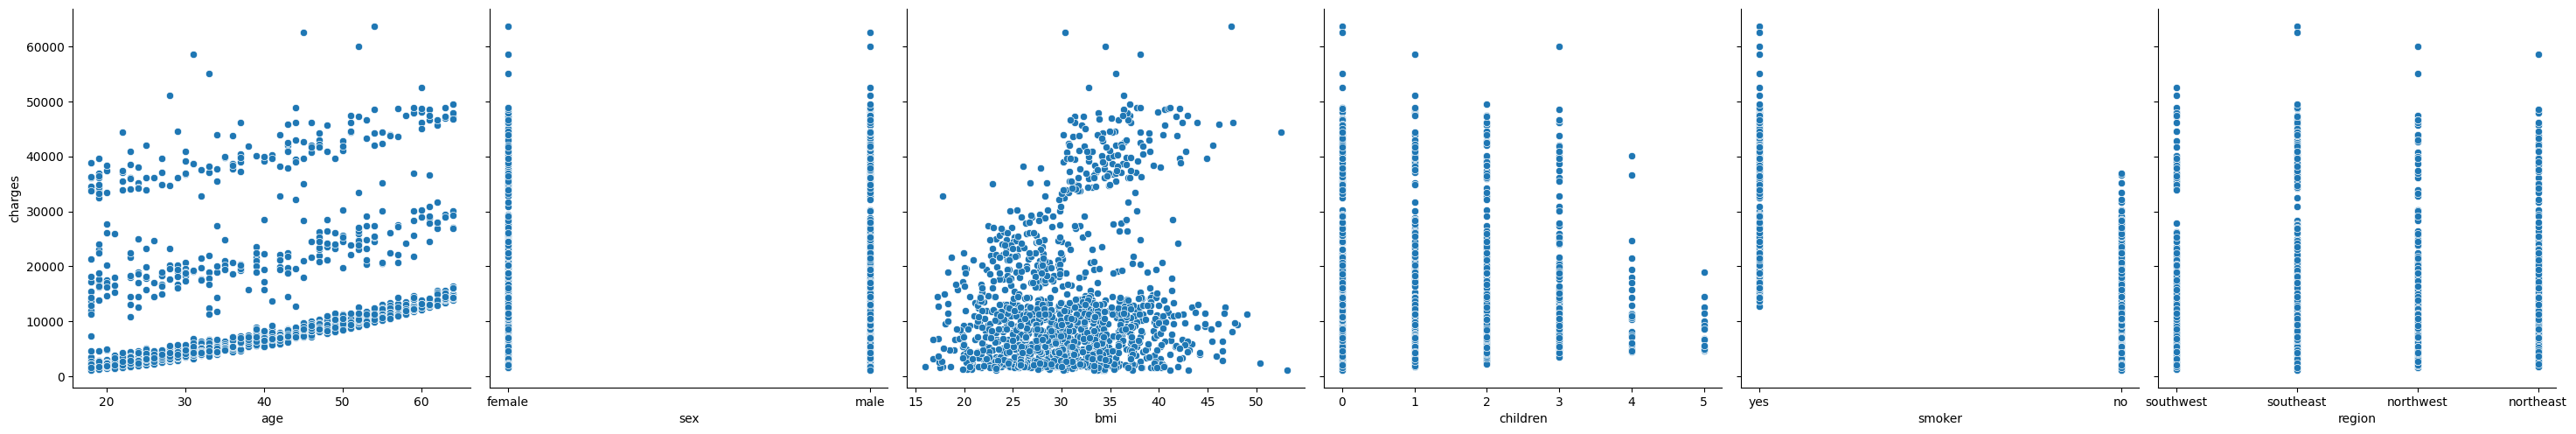

In [8]:
# visualize the data using pairplot
sns.pairplot(data, x_vars=['age','sex', 'bmi', 'children','smoker', 'region'],
             y_vars='charges', size=5, aspect=1, kind='scatter')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
# X is independen variabel, Y is dependen variable
X = data[['age','sex', 'bmi', 'children','smoker', 'region']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [15]:
from sklearn.linear_model import LinearRegression
# Creating a model object
model = LinearRegression()

# Training the model with the training data
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

a. Scatter Plot


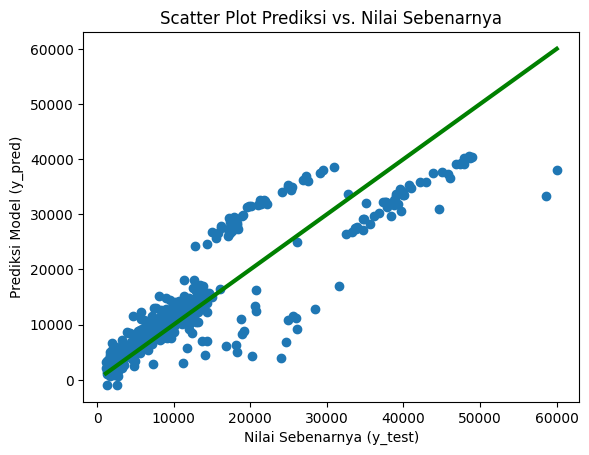

In [18]:
# Creating a scatter plot to compare predictions with actual values
plt.scatter(y_test, y_pred)
print('a. Scatter Plot')
plt.xlabel("Nilai Sebenarnya (y_test)")
plt.ylabel("Prediksi Model (y_pred)")
plt.title("Scatter Plot Prediksi vs. Nilai Sebenarnya")

# Adding a Regression Line (Diagonal Line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='-', linewidth=3)
plt.show()

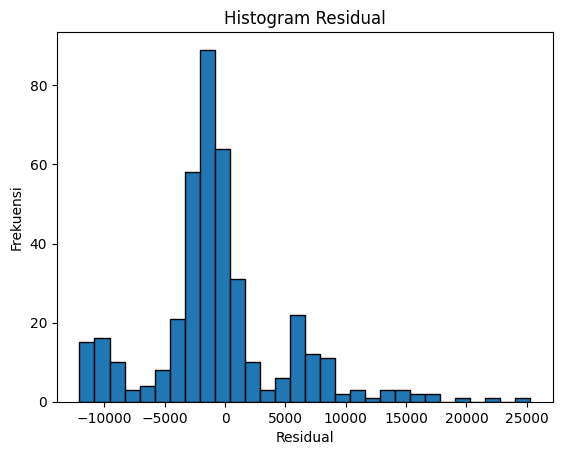

In [28]:
# Calculate residual
residuals = y_test - y_pred

# Making histogram residual
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.title("Histogram Residual")
plt.show()

In [40]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

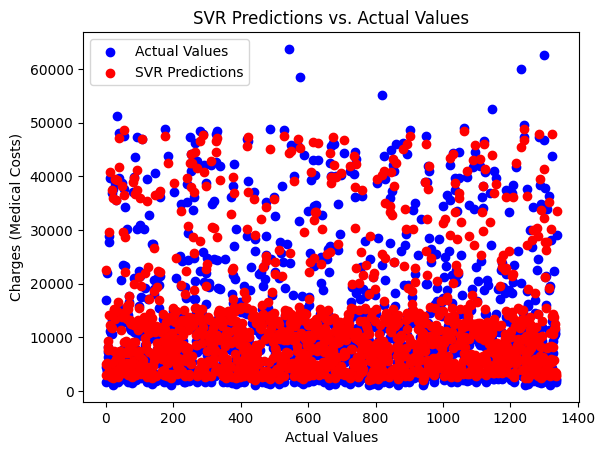

In [41]:
# Predicting on the training data
y_pred_scaled = svr.predict(X)

# Reshape the 1D array to 2D
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 1)

# Inverse transform the reshaped scaled predictions
y_pred = sc_y.inverse_transform(y_pred_scaled_reshaped)

# Inverse transform the scaled actual values
y_actual = sc_y.inverse_transform(y)

# Plotting the prediction results vs. actual values
plt.scatter(range(len(y_actual)), y_actual, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='SVR Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Charges (Medical Costs)')
plt.legend()
plt.title('SVR Predictions vs. Actual Values')
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = svr.predict(X)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_actual, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_actual, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_actual, y_pred)

# Display R-squared, MAE, MSE, RMSE
print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R-squared: 0.8580074170742829
MAE: 0.2012858673534939
MSE: 0.14199258292571715
RMSE: 0.3768190320640893
